# Task 1: Exploratory Data Analysis (EDA)

In [1]:
# Step 1: Load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 2: Load the dataset
df = pd.read_csv(r"C:\MIDHUN\wine.csv")

# Step 3: Basic Data Exploration
# Display the first few rows, data types, and summary statistics
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


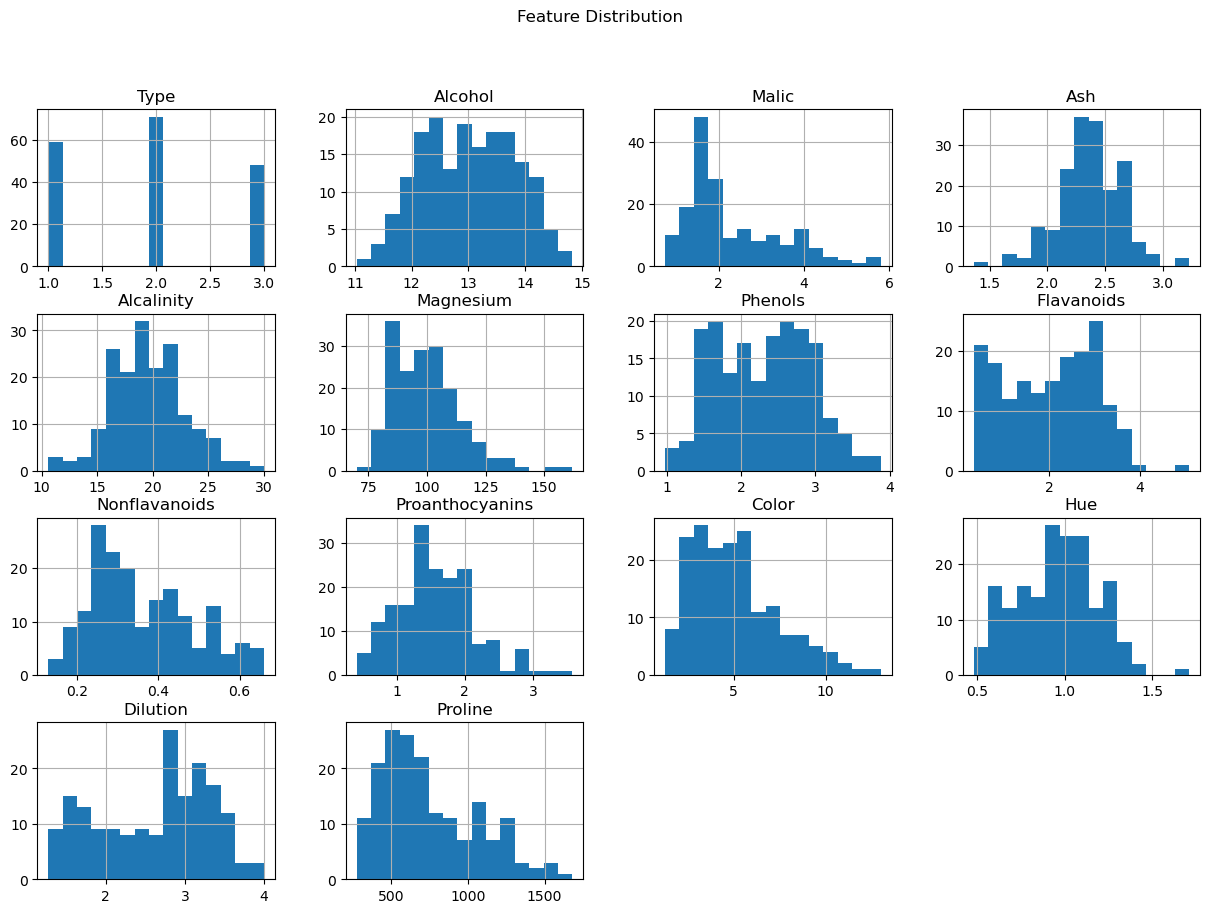

In [5]:
# Step 4: Examine the distribution of features
# Histograms
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distribution')
plt.show()


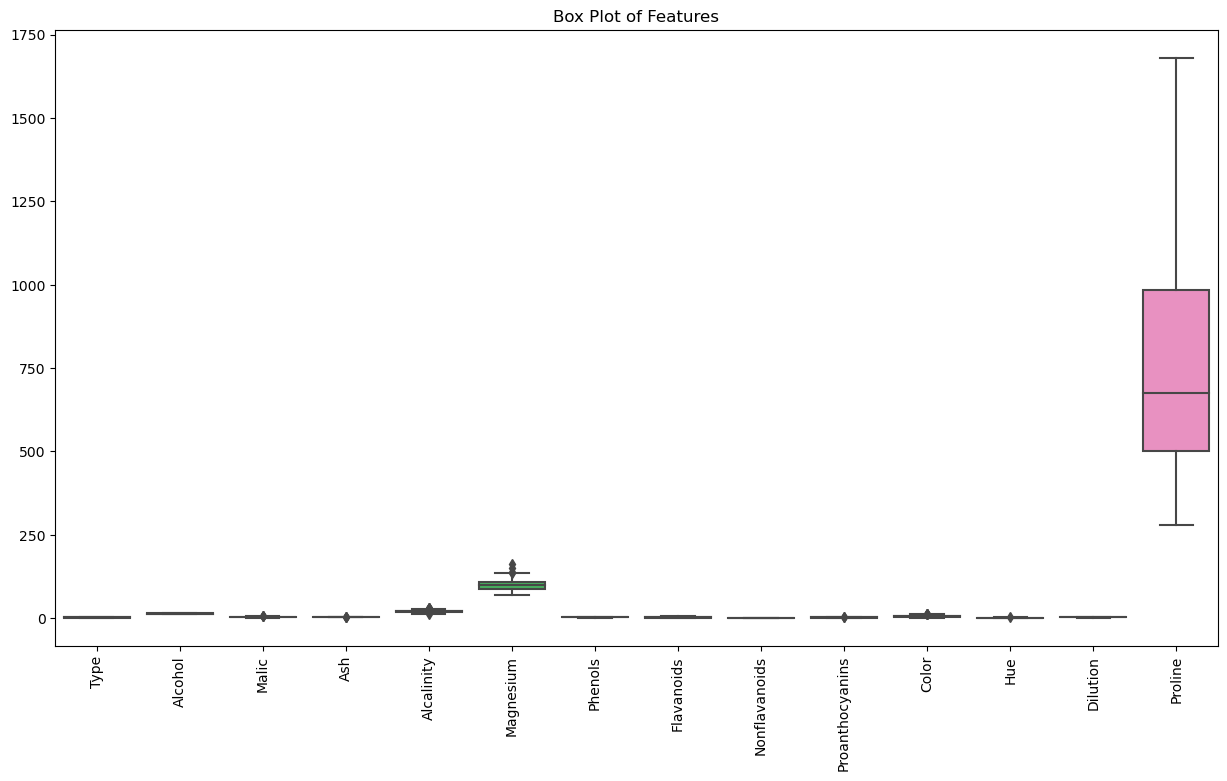

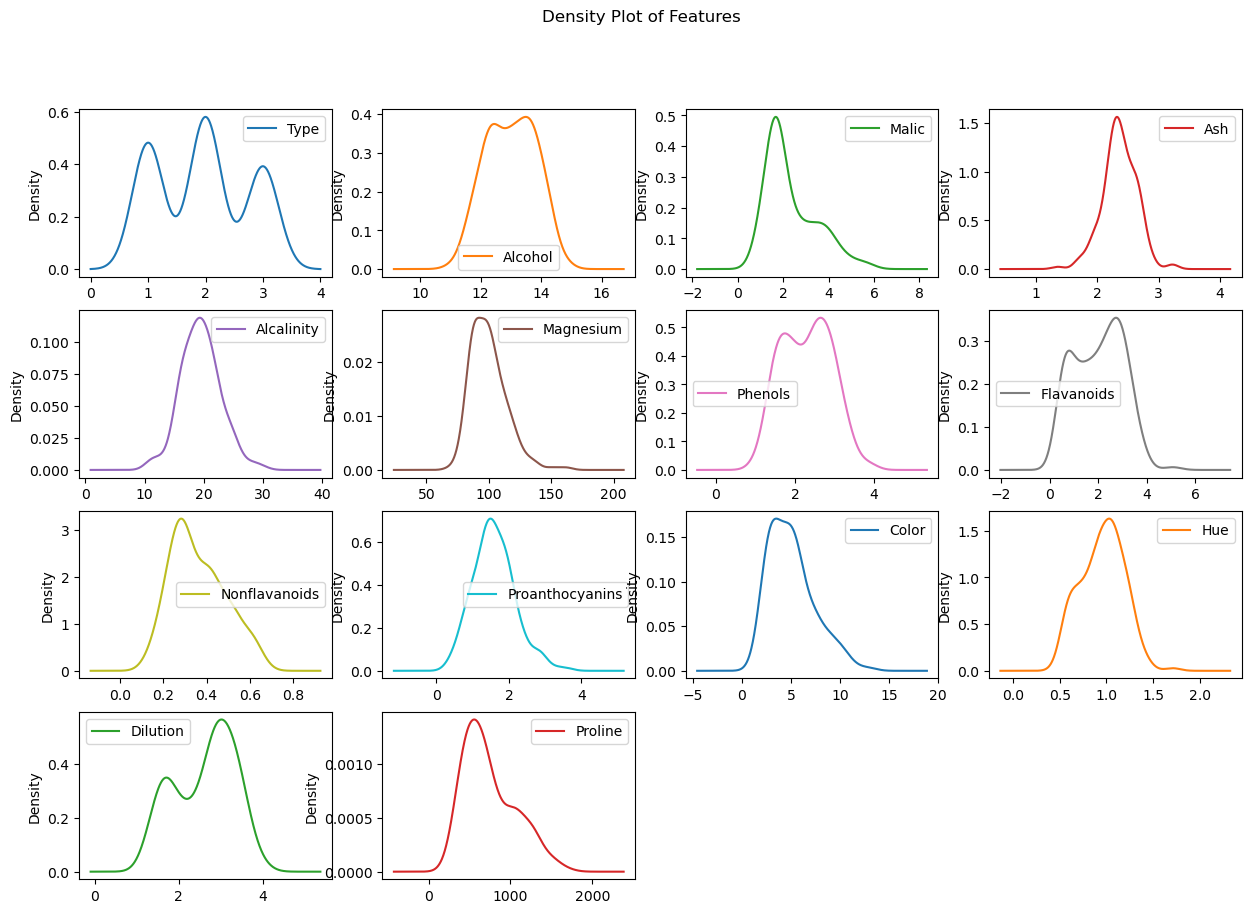

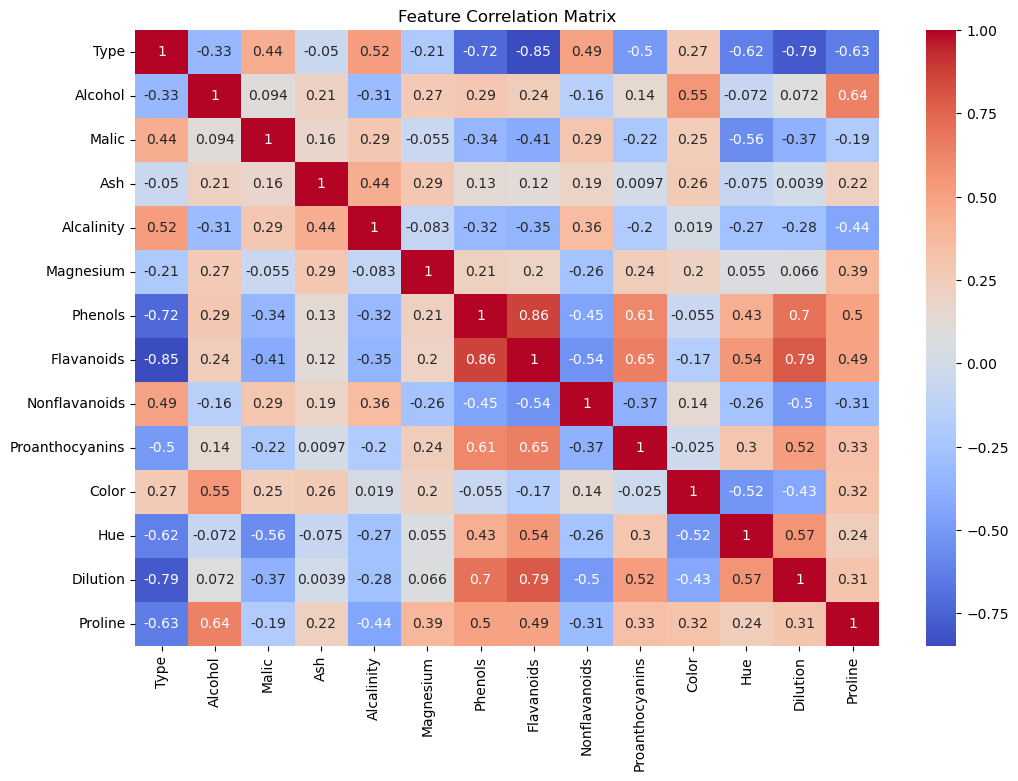

In [6]:
# Box Plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()

# Density Plots
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
plt.suptitle('Density Plot of Features')
plt.show()

# Step 5: Investigate correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


# Task 2: Dimensionality Reduction with PCA

In [7]:
# Step 1: Standardize the features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [8]:
# Step 2: Implement PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

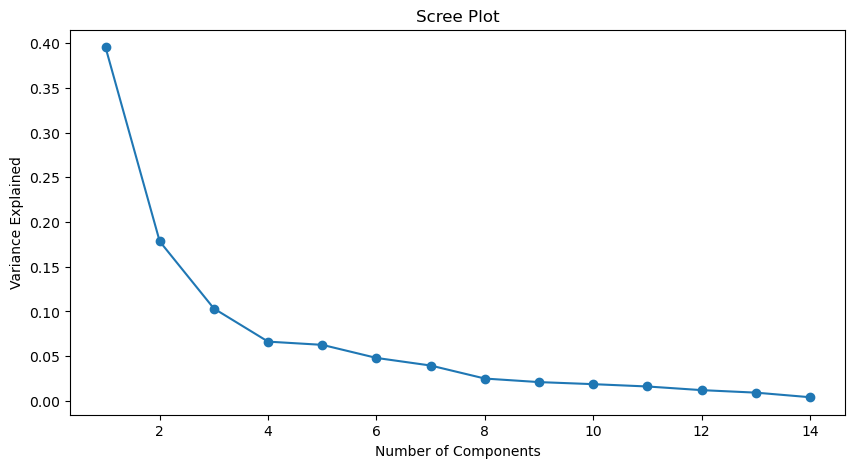

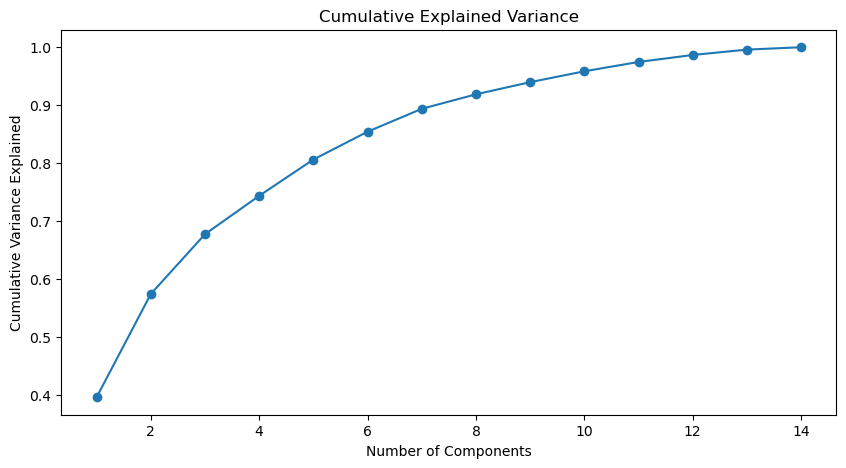

In [9]:
# Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

# Cumulative Explained Variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [11]:
# Step 3: Transform the original dataset into principal components
optimal_components = 2  # Choose based on the scree plot
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(scaled_data)

# Task 3: Clustering with Original Data

C:\Users\midhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


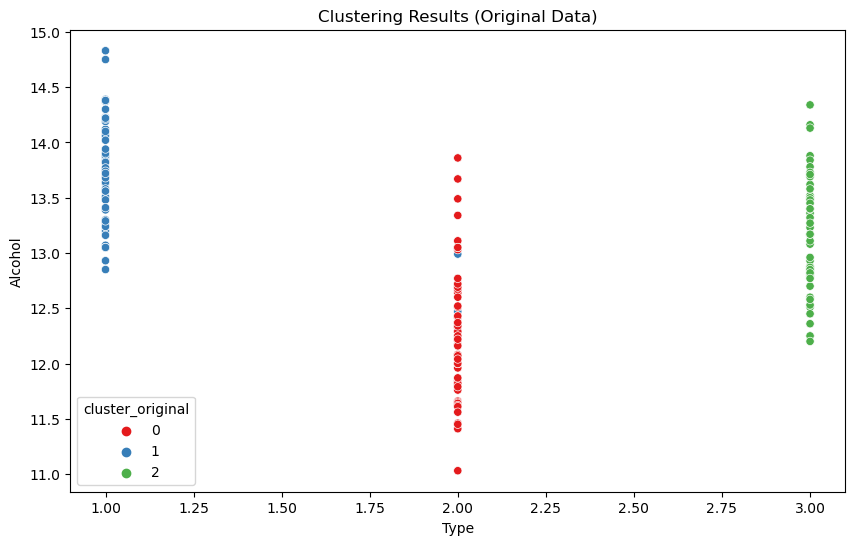

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Apply K-means Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['cluster_original'] = kmeans.fit_predict(scaled_data)

# Step 2: Visualize Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['cluster_original'], palette='Set1')
plt.title('Clustering Results (Original Data)')
plt.show()

# Step 3: Evaluate Clustering Performance
silhouette_original = silhouette_score(scaled_data, df['cluster_original'])
db_index_original = davies_bouldin_score(scaled_data, df['cluster_original'])
print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {db_index_original}")


# Task 4: Clustering with PCA Data

In [14]:
# Step 1: Apply the same clustering algorithm to PCA data
kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_data)

C:\Users\midhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


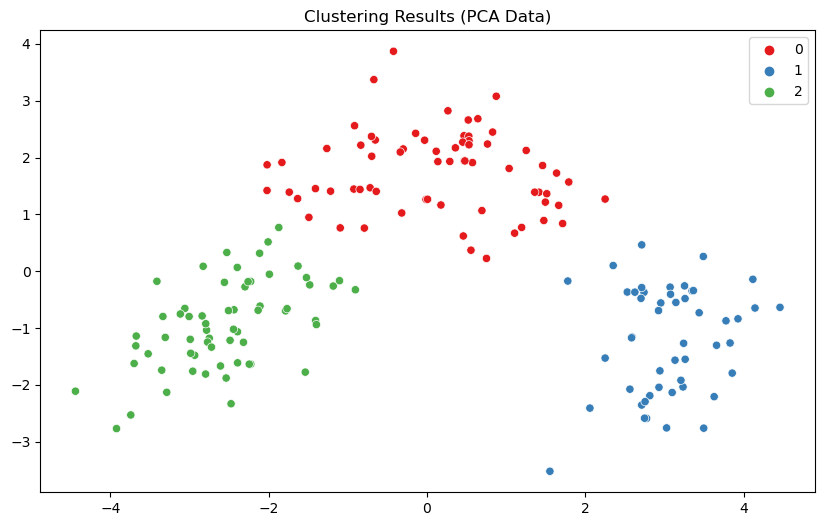

Silhouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (PCA Data): 0.5397078562575709


In [15]:
# Step 2: Visualize Clustering Results on PCA Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='Set1')
plt.title('Clustering Results (PCA Data)')
plt.show()

# Step 3: Evaluate Clustering Performance on PCA Data
silhouette_pca = silhouette_score(pca_data, pca_clusters)
db_index_pca = davies_bouldin_score(pca_data, pca_clusters)
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {db_index_pca}")


# Task 5: Comparison and Analysis

In [16]:
# Step 1-4: Compare Results
print("Comparison of Clustering Performance:")
print(f"Silhouette Score (Original): {silhouette_original} | (PCA): {silhouette_pca}")
print(f"Davies-Bouldin Index (Original): {db_index_original} | (PCA): {db_index_pca}")


Comparison of Clustering Performance:
Silhouette Score (Original): 0.30773604383565206 | (PCA): 0.6024415520362845
Davies-Bouldin Index (Original): 1.3163957434114109 | (PCA): 0.5397078562575709
